In [35]:

import pandas as pd

temperature_read_csv = pd.read_csv('GlobalLandTemperaturesByCity.csv')
# View the first few rows of the dataset
print(temperature_read_csv.head())

# Get some basic info about the dataset
print(temperature_read_csv.info())


           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                

In [36]:
# we convert the 'dt' time to datetime format so that we can use it for time series analysis
temperature_read_csv['dt'] = pd.to_datetime(temperature_read_csv['dt'])

# we extract the year out from the data column
temperature_read_csv['year'] = temperature_read_csv['dt'].dt.year

# we group each of the years together and calculate the respective means
global_temp = temperature_read_csv.groupby('year')['AverageTemperature'].mean()

# we reset the index so that we can use the year as a column
global_temp = global_temp.reset_index()

# we remove the rows with missing values
global_temp = global_temp.dropna()

# display the first few rows of the dataset
print(global_temp.head())








   year  AverageTemperature
0  1743            4.882424
1  1744           10.734047
2  1745            1.497593
7  1750            9.872808
8  1751           10.046739


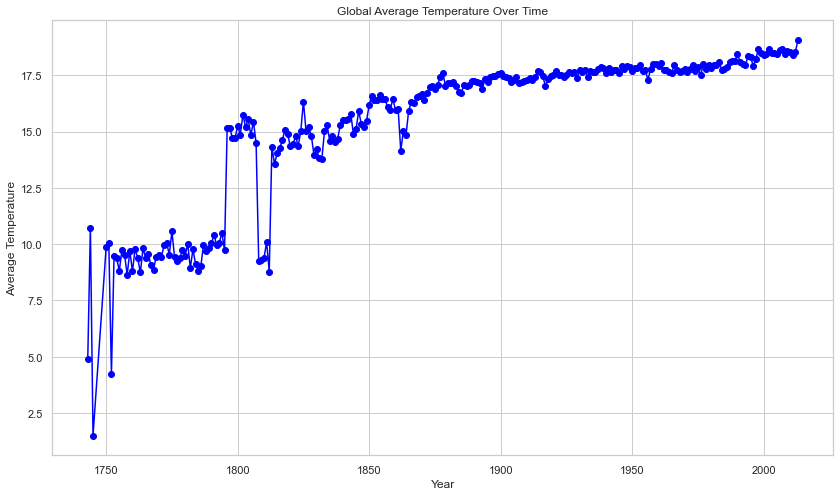

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(14, 8))
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.plot(global_temp['year'], global_temp['AverageTemperature'], color='blue', marker='o')
plt.show()


# Global Average Temperature Trends
The plot above shows the trend of global average temperatures over time. We can observe an upward trend, which indicates global warming as the average temperatures have increased consistently over the years.


/Users/atiyamahboob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/atiyamahboob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


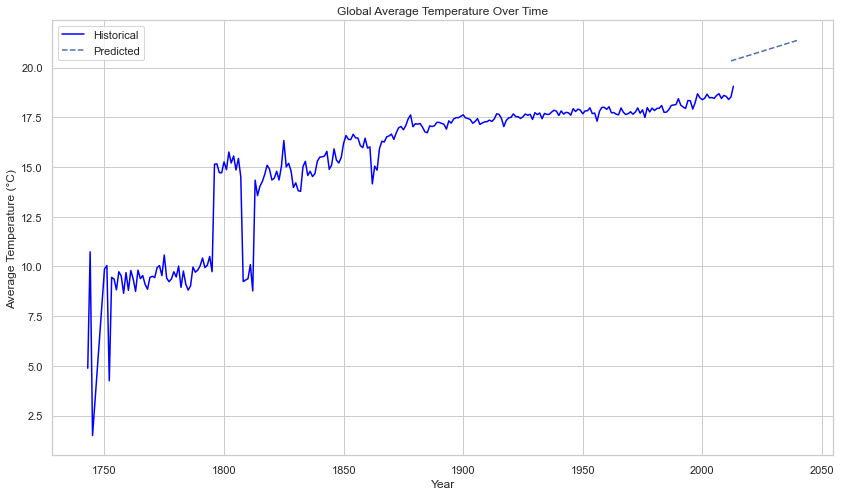

In [38]:
# we can use linear regression to predict the future temperature

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# we prepare the data for linear regression
X = global_temp['year'].values.reshape(-1, 1)
y = global_temp['AverageTemperature'].values

# we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict temperature anomalies for future years
# we conver the range of years to a nump array before we can use it for prediction- that will get rid of possible errors/warnings in console.
future_years = pd.DataFrame(np.arange(2012, 2041), columns=['year'])  # 'year' should be 'Year' for consistency
future_predictions = model.predict(future_years)

# plot the data and the future predictions
plt.figure(figsize=(14, 8))
sns.lineplot(global_temp['year'], global_temp['AverageTemperature'], label='Historical', color='blue')
sns.lineplot(x=future_years['year'], y=future_predictions, label= 'Predicted',linestyle='--') 
# plot the future predictions
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()